In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Importing Packages

In [3]:
import pandas as pd

Importing Dataframe


In [4]:
df = pd.read_csv('gdrive/MyDrive/data.csv')

In [5]:
df = df.head(10000)

In [6]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 7.0MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=4e602829faddff9e0f05d8012351f64b19c56b9d9ddb6bb309cda240d63da9b8
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


Importing Packages

In [7]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import spacy
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

from nltk.stem import WordNetLemmatizer
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
n = 1000

# Any results you write to the current directory are saved as output.



Importing packages

In [8]:
import numpy as np 
import pandas as pd 
import collections
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import os  
import re
import json
import seaborn as sb
import nltk
import glob
from tqdm import tqdm
from pathlib import Path
from copy import deepcopy

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [9]:
data = df.values.tolist()

Converting Sentences As Words And Assigning them as Tokens

In [10]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  

data_words = list(sent_to_words(data))

print(data_words[:1])

[['dd', 'fdba', 'simple', 'and', 'effective', 'primary', 'assessment', 'of', 'emergency', 'patients', 'in', 'covid', 'outbreak', 'area', 'retrospective', 'observational', 'study', 'di', 'gaohong', 'xia', 'chengkun', 'yao', 'shanglong', 'chen', 'xiangdong', 'wu', 'zhilin', 'hu', 'ling', 'wang', 'jie', 'http', 'doi', 'org', 'rmhp', 'background', 'the', 'rapid', 'spread', 'of', 'covid', 'has', 'expanded', 'into', 'pandemic', 'for', 'which', 'the', 'main', 'containment', 'strategies', 'to', 'reduce', 'transmission', 'are', 'social', 'distancing', 'and', 'isolation', 'of', 'ill', 'persons', 'thousands', 'of', 'medical', 'staff', 'have', 'been', 'infected', 'worldwide', 'coronavirus', 'testing', 'kits', 'have', 'been', 'in', 'short', 'supply', 'and', 'early', 'diagnostic', 'reagents', 'did', 'not', 'have', 'high', 'sensitivity', 'the', 'aim', 'of', 'this', 'study', 'was', 'to', 'describe', 'the', 'characteristics', 'of', 'patients', 'requiring', 'emergency', 'surgery', 'in', 'covid', 'outbre

In [11]:
docs_tokens = data_words

Making Bigrams For Topic Modelling of the Processed Text

In [12]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(docs_tokens, min_count=5, threshold=20) # higher threshold fewer phrases.
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
docs_bigram_tokens = [bigram_mod[doc] for doc in docs_tokens]

Creating Dictionary With Word-Id as Key and the word as Value

In [13]:
# Create Dictionary
id2word = corpora.Dictionary(docs_bigram_tokens)
id2word.filter_extremes(no_below=10, no_above=0.5, keep_n=100000)

Term Document Frequency For key and count of Words

In [14]:
# Term Document Frequency
bow_corpus = [id2word.doc2bow(doc) for doc in docs_bigram_tokens]

In [15]:
print(bow_corpus[:1])

[[(0, 1), (1, 4), (2, 12), (3, 6), (4, 2), (5, 3), (6, 4), (7, 4), (8, 1), (9, 3), (10, 5), (11, 3), (12, 8), (13, 8), (14, 1), (15, 3), (16, 4), (17, 12), (18, 7), (19, 21), (20, 1), (21, 3), (22, 15), (23, 1), (24, 8), (25, 4), (26, 4), (27, 8), (28, 6), (29, 6), (30, 29), (31, 12), (32, 1), (33, 3), (34, 4), (35, 1), (36, 3), (37, 4), (38, 3), (39, 1), (40, 4), (41, 1), (42, 3), (43, 20), (44, 16), (45, 1), (46, 3), (47, 1), (48, 3), (49, 5), (50, 3), (51, 8), (52, 20), (53, 3), (54, 4), (55, 1), (56, 3), (57, 4), (58, 4), (59, 2), (60, 4), (61, 4), (62, 3), (63, 4), (64, 1), (65, 3), (66, 3), (67, 1), (68, 16), (69, 1), (70, 3), (71, 2), (72, 6), (73, 24), (74, 12), (75, 3), (76, 1), (77, 2), (78, 6), (79, 3), (80, 4), (81, 12), (82, 1), (83, 1), (84, 3), (85, 4), (86, 4), (87, 16), (88, 5), (89, 1), (90, 1), (91, 3), (92, 44), (93, 3), (94, 4), (95, 4), (96, 4), (97, 1), (98, 3), (99, 4), (100, 18), (101, 6), (102, 4), (103, 1), (104, 3), (105, 4), (106, 4), (107, 3), (108, 4), (1

Helper Functions

In [16]:
 def find_num_topics(dictionary, corpus, docs, end, start=2, step=2):
        
    coherence_values = []
    model_list = []
    for num_topics in tqdm(range(start, end, step)):
        model = LdaModel(
            corpus=corpus,
            num_topics=num_topics,
            id2word=id2word,
            update_every=1,
            eval_every = 100,
            random_state=100,
            chunksize=2000,
            passes=4,
            iterations=100,
            per_word_topics=True,
        )

        model_list.append(model)
        coherencemodel = CoherenceModel(
            model=model, texts=docs, dictionary=dictionary, coherence="c_v"
        )
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [17]:
def plot_coherence_score(num_topic, coherence_score):

    p = figure(plot_width=400, plot_height=400)

    # Add both a line and circles on the same plot
    p.line(num_topic, coherence_score, line_width=2)
    p.circle(num_topic, coherence_score, fill_color="white", size=8)
    p.xaxis.axis_label = "Number Of Topics"
    p.yaxis.axis_label = "Coherence Score"

    show(p)

In [18]:
def visualize_topics(lda_model, corpus, id2word):
    """
    Generate a visual dashboard of LDA topics
    """
    pyLDAvis.enable_notebook()
    
    return pyLDAvis.gensim.prepare(lda_model, corpus, id2word)

In [19]:
def print_topics(lda_model):
    """
    Print topics made of keywords found in LDA model
    """
    columns_name = []
    pd_dict = {}

    num_topic = lda_model.num_topics
    for i in range(num_topic):
        columns_name.append(((f"Topic_{i+1}", "Word")))
        words, weight = zip(*lda_model.show_topic(i))
        pd_dict[f"topic{i+1}"] = list(words)

    df = pd.DataFrame(pd_dict)

    return df

Import Packages

In [20]:
from gensim.models import CoherenceModel, TfidfModel
from gensim.models import LdaModel, LdaMulticore
from gensim.models.phrases import Phrases, Phraser
from gensim.corpora import Dictionary

Training LDA Models For Diffrent Number Of Topics

In [21]:
start_topic, end_topic, step = 10, 18, 2

# Train LDA models
model_list, coherence_values = find_num_topics(
    dictionary=id2word,
    corpus=bow_corpus,
    docs=docs_bigram_tokens, 
    start=start_topic, 
    end=end_topic,
    step=step
    )

100%|██████████| 4/4 [27:15<00:00, 408.89s/it]


Importing Packages

In [22]:
!pip install glove_python
!pip install pyjarowinkler

     |████████████████████████████████| 266kB 6.7MB/s 
  Created wheel for glove-python: filename=glove_python-0.1.0-cp36-cp36m-linux_x86_64.whl size=700278 sha256=0ea17ee186d5d7800ee4c5eb1038eb9b2ac704d654f24863230ddd85322fee72
  Stored in directory: /root/.cache/pip/wheels/88/4b/6d/10c0d2ad32c9d9d68beec9694a6f0b6e83ab1662a90a089a4b
Successfully built glove-python


Importing Packages

In [23]:
# Basics
import gc
import re
import os
import json
import heapq
import pickle
import string
import random
import logging
import datetime
from tqdm import tqdm
from pathlib import Path
from copy import deepcopy
from unicodedata import normalize

# Multiprocessing, compute acceleration
import numba
from numba import prange

# NLP
import nltk
import spacy
from glove import Corpus, Glove
from gensim.utils import deaccent
# nltk.download('stopwords')
from nltk.corpus import stopwords
from gensim.models import CoherenceModel, TfidfModel
from gensim.models import LdaModel, LdaMulticore
from gensim.models.phrases import Phrases, Phraser
from gensim.corpora import Dictionary
from pyjarowinkler import distance

# Graphs
import networkx as nx

# Data Science
import umap
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Visuals
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
import pyLDAvis
import pyLDAvis.gensim
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline
output_notebook()

Plotting The Coherence Score To find the Best Value for Number Of Topics

In [24]:
plot_coherence_score(range(start_topic, end_topic, step), coherence_values)

In [25]:
bow_lda_model = model_list[1]

Checking the Perplexity Score of the Model

In [26]:
# Compute Perplexity
print('Perplexity: ', bow_lda_model.log_perplexity(bow_corpus))

Perplexity:  -8.384721911704508


Words To Topic Assignment

In [27]:
print_topics(bow_lda_model)

,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,topic11,topic12
0,public,et_al,sars_cov,social,care,sars_cov,algorithm,age,cell,severe,preprint,infected
1,country,energy,detection,et_al,medical,vaccine,user,sars_cov,cells,therapy,display,epidemic
2,countries,surface,samples,students,hospital,viral,network,severe,protein,mortality,author_funder,parameter
3,government,water,sample,care,healthcare,et_al,performance,symptoms,sars_cov,hospital,copyright_holder,probability
4,people,temperature,testing,people,staff,rna,problem,children,expression,lung,perpetuity,models
5,policy,fig,sensitivity,participants,testing,sequence,dataset,mortality,et_al,days,has_granted,parameters
6,economic,concentration,antibody,experience,service,gene,task,association,viral,icu,medrxiv_license,network
7,global,flow,image,knowledge,safety,genome,graph,care,cd,care,version_posted,distribution
8,china,air,diagnostic,student,transmission,against,models,hospital,ace,respiratory,international_license,individuals
9,lockdown,material,negative,education,ppe,viruses,section,years,il,cancer,peer_review,estimate


In [28]:
lda_model = bow_lda_model

Helper Functions

In [29]:
def topic_all_documents(lda_model, corpus, texts):
    """
    Obtain topics for all the documents
    """
    # Init output
    documents_topic_df = pd.DataFrame()
    columns_name = ["Document", "Dominant Topic", "Topic Score", "Word List"]
    columns_name.extend([f"Topic_{i+1}" for i in range(lda_model.num_topics)])
    columns_name.append("Text")

    words_topic = []
    for i in range(lda_model.num_topics):
        x, _ = zip(*lda_model.show_topic(i))
        words_topic.append(list(x))

    for document_indx, topic_score in enumerate(lda_model.get_document_topics(corpus)):
        dominant_topic = sorted(topic_score, key=lambda x: x[1], reverse=True)[0]

        row_score = np.zeros(lda_model.num_topics)
        index, score = zip(*topic_score)
        row_score[list(index)] = score
        row_score = np.around(row_score, 4)

        documents_topic_df = documents_topic_df.append(
            pd.concat(
                [
                    pd.Series(
                        [
                            int(document_indx),
                            dominant_topic[0] + 1,
                            round(dominant_topic[1], 4),
                            words_topic[dominant_topic[0]],
                        ]
                    ),
                    pd.Series(row_score),
                ],
                ignore_index=True,
            ),
            ignore_index=True,
        )

    # Add original text to the end of the output
    contents = pd.Series(texts)
    documents_topic_df = pd.concat([documents_topic_df, contents], axis=1)

    documents_topic_df.columns = columns_name
    documents_topic_df["Dominant Topic"] = pd.to_numeric(
        documents_topic_df["Dominant Topic"]
    )
    documents_topic_df["Document"] = pd.to_numeric(documents_topic_df["Document"])

    return documents_topic_df

Document To Topic Assignment

In [30]:
documents_topic_df = topic_all_documents(
    lda_model=lda_model, corpus=bow_corpus, texts=docs_bigram_tokens
)

In [31]:
documents_topic_df.head(5)

,Document,Dominant Topic,Topic Score,Word List,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Text
0,0.0,10.0,0.4072,"[severe, therapy, mortality, hospital, lung, d...",0.0000,0.0000,0.0912,0.0000,0.2394,0.0000,0.0000,0.2621,0.0000,0.4072,0.0000,0.0000,"[dd, fdba, simple, and, effective, primary, as..."
1,1.0,10.0,0.3005,"[severe, therapy, mortality, hospital, lung, d...",0.0000,0.0241,0.1143,0.0000,0.0000,0.0461,0.0000,0.0000,0.2848,0.3005,0.2301,0.0000,"[fd_ef, cf, ace, prothrombotic, antibodies, in..."
2,2.0,8.0,0.6021,"[age, sars_cov, severe, symptoms, children, mo...",0.0807,0.0000,0.0000,0.2122,0.0000,0.0000,0.0000,0.6021,0.0000,0.0000,0.0000,0.1048,"[aeaf, cadb, impact, of, covid, related, lockd..."
3,3.0,8.0,0.8480,"[age, sars_cov, severe, symptoms, children, mo...",0.0000,0.0000,0.0336,0.0000,0.0000,0.1116,0.0000,0.8480,0.0000,0.0000,0.0000,0.0000,"[bb, fc_ab, ac, rates, and, characteristics, o..."
4,4.0,7.0,0.7404,"[algorithm, user, network, performance, proble...",0.0000,0.0000,0.0000,0.0000,0.2476,0.0000,0.7404,0.0000,0.0000,0.0000,0.0000,0.0000,"[de, dffcb, dae, ce, scalable, and, communicat..."


Most Representative Documents For Each Topic

In [32]:
most_representative_df = pd.DataFrame()
domiant_topic_df = documents_topic_df.groupby("Dominant Topic")

for i, grp in domiant_topic_df:
    most_representative_df = pd.concat(
        [
            most_representative_df,
            grp.sort_values(["Topic Score"], ascending=False).head(1),
        ],
        axis=0,
    )

most_representative_df.reset_index(drop=True, inplace=True)

most_representative_df = most_representative_df.iloc[:, 0:4]

most_representative_df.columns = [
    "Document",
    "Topic_Num",
    "Best Topic Score",
    "Word List",
]

In [33]:
most_representative_df.style.background_gradient(cmap='viridis')

,Document,Topic_Num,Best Topic Score,Word List
0,5568.000000,1.000000,0.998300,"['public', 'country', 'countries', 'government', 'people', 'policy', 'economic', 'global', 'china', 'lockdown']"
1,6136.000000,2.000000,0.999800,"['et_al', 'energy', 'surface', 'water', 'temperature', 'fig', 'concentration', 'flow', 'air', 'material']"
2,471.000000,3.000000,0.955800,"['sars_cov', 'detection', 'samples', 'sample', 'testing', 'sensitivity', 'antibody', 'image', 'diagnostic', 'negative']"
3,5934.000000,4.000000,0.999800,"['social', 'et_al', 'students', 'care', 'people', 'participants', 'experience', 'knowledge', 'student', 'education']"
4,8990.000000,5.000000,0.958800,"['care', 'medical', 'hospital', 'healthcare', 'staff', 'testing', 'service', 'safety', 'transmission', 'ppe']"
5,1510.000000,6.000000,0.999800,"['sars_cov', 'vaccine', 'viral', 'et_al', 'rna', 'sequence', 'gene', 'genome', 'against', 'viruses']"
6,1746.000000,7.000000,0.999900,"['algorithm', 'user', 'network', 'performance', 'problem', 'dataset', 'task', 'graph', 'models', 'section']"
7,1259.000000,8.000000,0.995300,"['age', 'sars_cov', 'severe', 'symptoms', 'children', 'mortality', 'association', 'care', 'hospital', 'years']"
8,2398.000000,9.000000,0.999900,"['cell', 'cells', 'protein', 'sars_cov', 'expression', 'et_al', 'viral', 'cd', 'ace', 'il']"
9,3774.000000,10.000000,0.999700,"['severe', 'therapy', 'mortality', 'hospital', 'lung', 'days', 'icu', 'care', 'respiratory', 'cancer']"


Document-Topic Distribution

In [34]:
def topic_distribution(lda_model, documents_topic_df):
    """
    
    """
    topic_avg = documents_topic_df.groupby(['Dominant Topic'])["Topic Score"].mean()
    topic_count = documents_topic_df.groupby(['Dominant Topic'])['Document'].count()

    topic_df = pd.DataFrame()
    topic_df['Average'] = topic_avg
    topic_df['Count'] = topic_count
    topic_df = topic_df.reset_index()
    
    topic_df = topic_df.fillna(0)

    topic_df.plot.bar(x='Dominant Topic', y='Count', rot=0)

    return topic_df

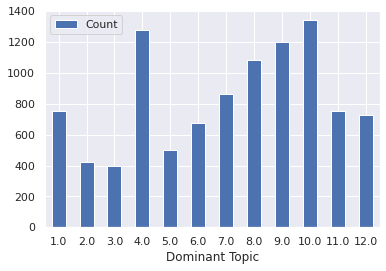

In [35]:
topic_distibution_res = topic_distribution(lda_model, documents_topic_df)

In [36]:
topic_distibution_res.style.background_gradient(cmap='viridis')

,Dominant Topic,Average,Count
0,1.000000,0.564312,756
1,2.000000,0.624779,425
2,3.000000,0.555332,397
3,4.000000,0.645111,1278
4,5.000000,0.510001,502
5,6.000000,0.608418,678
6,7.000000,0.718051,861
7,8.000000,0.568183,1081
8,9.000000,0.654040,1197
9,10.000000,0.649808,1341


Word Clouds For each of the Topics

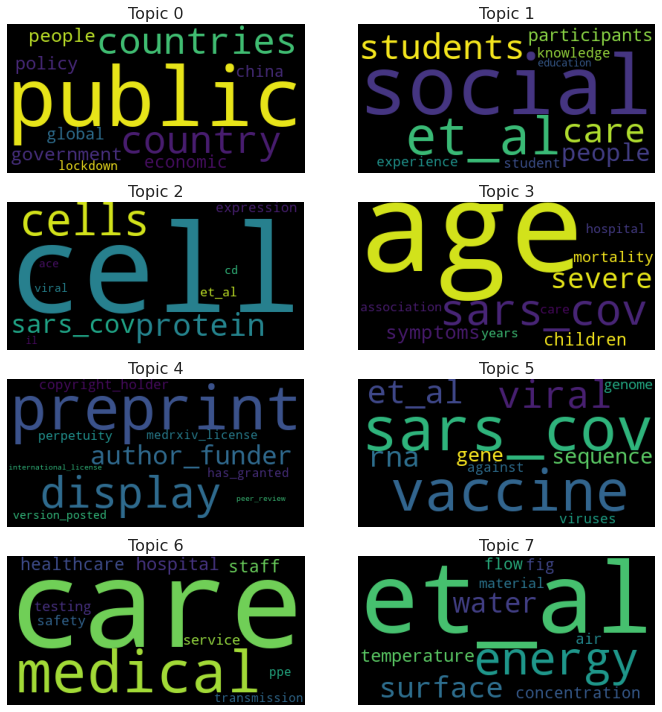

In [37]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  

cloud = WordCloud(prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(4, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

T-SNE Plot for Clusters of Documents

In [38]:
def plot_tsne(lda_model):    
    """
    Plot Documents Clusters based on topics scors
    """
    topic_score = documents_topic_df.iloc[:,4: 4 + lda_model.num_topics]
    
    topic_num = np.array(documents_topic_df.iloc[:,1]).astype(int)

    # tSNE Dimension Reduction
    tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
    tsne_lda = tsne_model.fit_transform(topic_score)

    # Plot the Topic Clusters using Bokeh
    output_notebook()
    n_topics = lda_model.num_topics
    mycolors = np.array([color for name, color in mcolors.CSS4_COLORS.items()])
    
    plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
                  plot_width=900, plot_height=700)
    plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num + 5])
    show(plot)

In [39]:
plot_tsne(lda_model)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.060s...
[t-SNE] Computed neighbors for 10000 samples in 1.426s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.004603
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.924515
[t-SNE] KL divergence after 1000 iterations: 1.243994


PREDICTION OF UNKNOWN DOCUMENTS

In [40]:
def prediction_unseen_doc(lda_model, doc, threshold=0.1):
    """
    Get the most representative topic of a new documment
    """
    doc_preprocessed = doc.split()
    doc_tokens = bigram_mod[doc_preprocessed]
    bow_tokens = id2word.doc2bow(doc_tokens)

    rows = []
    for i, score in sorted(
        lda_model.get_document_topics(bow_tokens), key=lambda x: x[1], reverse=True
    ):
        if score > threshold:
            words, _ = zip(*lda_model.show_topic(i))
            rows.append([f"Topic_{i+1}", score, "; ".join(words)])
            break

    return pd.DataFrame(rows, columns=["Topic", "Score", "Words"])

In [41]:
def document_same_topic(df_topic, documents_topic_df, df_merged):
    """
    Obtain documents that have the same topic as df_topic
    """

    for index, row in df_topic.iterrows():
        topic = int(row["Topic"].split("_")[-1])

        doc_same_topic = list(
            documents_topic_df[documents_topic_df["Dominant Topic"] == topic][
                "Document"
            ]
        )

        doc_detail = df_merged.loc[doc_same_topic]

    return doc_detail

Listing Queries And Preprocessing them

In [42]:
# Define the queries
QUERY1 = '''
How widespread current exposure is to be able to make immediate policy recommendations on mitigation measures. Denominators for testing and a mechanism for rapidly sharing that information, including demographics, to the extent possible. Sampling methods to determine asymptomatic disease ( use of serosurveys (such as convalescent samples) and early detection of disease ( use of screening of neutralizing antibodies such as ELISAs).
'''
QUERY2 = '''
Efforts to increase capacity on existing diagnostic platforms and tap into existing surveillance platforms.
'''
QUERY3 = '''
Recruitment, support, and coordination of local expertise and capacity (public, private commercial, and non profit, including academic), including legal, ethical, communications, and operational issues.
'''
QUERY4 = '''
National guidance and guidelines about best practices to states ( how states might leverage universities and private laboratories for testing purposes, communications to public health officials and the public).
'''
QUERY5 = '''
Coupling genomics and diagnostic testing on  large scale.
'''

Installing Dependencies for Pre-Processing

In [43]:
!pip install langdetect
# Install language models
!python -m spacy download en
!python -m spacy download fr
!python -m spacy download es
!python -m spacy download it
!python -m spacy download de
!python -m spacy download pt

     |████████████████████████████████| 983kB 5.9MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993194 sha256=5a738a7afeb74358a45e11046628e5cbb7b246e9179f303a86bd2b8be1190803
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')
     |████████████████████████████████| 14.7MB 1.1MB/s 
  Created wheel for fr-core-news-sm: filename=fr_core_news_sm-2.2.5-cp36-none-any.whl size=14727027 sha256=1f9261d64bdd7d67c2bcfac1fe449a4a2b6a1e1332b03b03a006d446637f3bcb
  Stored in directory: /tmp/pip-ephem-wheel-cache-hrj68o6a/wheels/46/1b/e6/29b020e3f9420a24c3f463343afe5136aaaf955dbc9e46dfc5
Successfully bu

In [44]:
class Preprocessor(object):
    """
    Class that is used to clean raw str
    """
    def __init__(self, force_deaccent, force_ascii, min_token_len, stop_list_custom, disabled_components, default_language):
        
        self.force_deaccent = force_deaccent
        self.force_ascii = force_ascii
        self.default_language = default_language
        self.min_token_len = min_token_len
        self.nlp_list = {
            "en": spacy.load("en", disable=disabled_components),
            "fr": spacy.load("fr", disable=disabled_components),
            "es": spacy.load("es", disable=disabled_components),
            "it": spacy.load("it", disable=disabled_components),
            "de": spacy.load("de", disable=disabled_components),
            "pt": spacy.load("pt", disable=disabled_components),
            }
        self.stop_list_all = self.init_stopwords(stop_list_custom)

    def init_stopwords(self, stop_list_custom):
        """
        Get list of stopwords from nltk, spacy and used custom list 
        """
        # Get nltk stopwords
        stop_list_nltk = list(set(stopwords.words('english'))) \
        + list(set(stopwords.words('french'))) \
        + list(set(stopwords.words('spanish'))) \
        + list(set(stopwords.words('italian'))) \
        + list(set(stopwords.words('german'))) \
        + list(set(stopwords.words('portuguese')))
        # Get spacy stopwords
        stop_list_spacy = list(spacy.lang.en.stop_words.STOP_WORDS) \
        + list(spacy.lang.fr.stop_words.STOP_WORDS) \
        + list(spacy.lang.es.stop_words.STOP_WORDS) \
        + list(spacy.lang.it.stop_words.STOP_WORDS) \
        + list(spacy.lang.de.stop_words.STOP_WORDS) \
        + list(spacy.lang.pt.stop_words.STOP_WORDS) \
        
        return stop_list_nltk+stop_list_spacy+stop_list_custom
    
    def detect_language(self, text):
        """
        Detect language with langdetect
        """
        try:
            lang = detect(text)
        except:
            lang = "unknown"
        return lang 

    def preprocess(self, text):
        """
        Main function to preprocess the text
        """
        lang = self.detect_language(text)
            
        if lang in ["en", "fr", "es", "it", "de", "pt"]:
            nlp = self.nlp_list[lang]
        else:
            nlp = self.nlp_list[self.default_language]
            
        # Delete some punctuation before preprocessing BUT not all of it because some can be involved in n-grams (e.g. "-")
        text=re.sub(r'[!"#$%&\'()*+,./:;<=>?@\[\\\]^_`{|}~]',r' ',text) 
        
        # Apply spacy to the text
        doc = nlp(text)
        # Lemmatization, remotion of noise (stopwords, digit, puntuaction and singol characters)
        tokens = [
            token.lemma_ for token in doc if
            token.lemma_ != '-PRON-'
            and not token.is_punct
            and not token.is_digit
            and not token.like_num
            and not token.like_url
            and not token.like_email
            and len(token.lemma_) >= self.min_token_len and len(token.text) >= self.min_token_len
            and token.lemma_.lower() not in self.stop_list_all and token.text.lower() not in self.stop_list_all
        ]
        
        # Recreation of the text
        text = " ".join(tokens)

        # Remove accents, normalize to ascii
        if self.force_ascii:
            text = normalize('NFD', text).encode('ascii', 'ignore').decode('UTF-8')
        
        if self.force_deaccent:
            text = deaccent(text)
    
        # Remove double spaces
        text=re.sub(r'\s+',r' ',text)
        
        # Set as lowercase
        text = text.lower().strip()

        return text

In [45]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [46]:
preprocessor = Preprocessor(
    force_ascii=False,
    force_deaccent=True,
    min_token_len=1,
    stop_list_custom=[
         'tp', 'fp' 'cc_nc', 'q_q', 'r', 'b', 'p', 'q', 'h', 'cc', 'doi', 'medrxiv', 'fig', 'org', 'tb','et','al','et_al','bb','cd','il','g'
    ],
    disabled_components=['parser', 'ner'],
    default_language='en'
)

In [47]:
# Preprocess the queries
query_1_preprocessed = preprocessor.preprocess(QUERY1)
query_2_preprocessed = preprocessor.preprocess(QUERY2)
query_3_preprocessed = preprocessor.preprocess(QUERY3)
query_4_preprocessed = preprocessor.preprocess(QUERY4)
query_5_preprocessed = preprocessor.preprocess(QUERY5)

Predicting the Topics that the Query Might Belong To

In [48]:
unseen_doc_q1 = prediction_unseen_doc(lda_model=lda_model,doc=query_1_preprocessed)
unseen_doc_same_topic_q1 = document_same_topic(unseen_doc_q1, documents_topic_df, df).head(10)

In [49]:
unseen_doc_q1.style.background_gradient(cmap='viridis')

,Topic,Score,Words
0,Topic_3,0.449858,sars_cov; detection; samples; sample; testing; sensitivity; antibody; image; diagnostic; negative


In [50]:
unseen_doc_same_topic_q1.head()

,Unnamed: 0,paper_id,title,authors,doi,abstract,publish_time,full_text,title_abstract_text,language,title_abstract_text_preprocessed,processed_text
139.0,44689,f22e25e0d9cd9e15731a754d1f32073338ec65a0,The importance of standardisation – COVID-19 C...,"Misztal, Krzysztof; Pocha, Agnieszka; Durak-Ko...",http://doi.org/10.1016/j.compbiomed.2020.104092,With the number of affected individuals still ...,2020-10-28,"At the end of 2019, a new coronavirus SARS-CoV...",The importance of standardisation – COVID-19 C...,en,importance standardisation covid-19 ct radiogr...,The importance of standardisation – COVID-19 C...
151.0,58853,0fa68b4a299089c06eeae6ccdd9a4f6917ac4a06,Validation and implementation of a direct RT-q...,"Brotons, P.; Perez-Arguello, A.; Launes, C.; T...",http://doi.org/10.1101/2020.11.19.20234245,Objective To validate and implement an optimiz...,2020-11-27,"The burden and health, educational, and econom...",Validation and implementation of a direct RT-q...,en,validation implementation direct rt qpcr metho...,Validation and implementation of a direct RT-q...
156.0,34035,aad4d4988ee71c1d555c995e54e1512c35783b01,Immunochromatographic assays for COVID-19 epid...,"Bartolini, A.; Scapaticci, M.; Bioli, M.; Lazz...",http://doi.org/10.1101/2020.05.28.20116046,"In March 2020, the World Health Organization (...",2020-06-02,Coronavirus disease 2019 (COVID- 19) is an inf...,Immunochromatographic assays for COVID-19 epid...,en,immunochromatographic assay covid-19 epidemiol...,Immunochromatographic assays for COVID-19 epid...
162.0,29352,dd8a0604168cee2996b49dbf9dd38412eb2b0bb3,Saliva as a testing specimen with or without p...,"Sun, Q.; Li, J.; Ren, H.; Pastor, L.; Loginova...",http://doi.org/10.1101/2020.10.27.20219196,Background Sensitive and high throughput molec...,2020-11-01,"A novel coronavirus, severe acute respiratory ...",Saliva as a testing specimen with or without p...,en,saliva testing speciman pool sars cov-2 detect...,Saliva as a testing specimen with or without p...
169.0,7216,4a8e14467dda8a59309ecbd9ddb86cd28cae17d6,Uncertainty Assisted Robust Tuberculosis Ident...,NaN,http://doi.org/10.1109/access.2020.2970023,Tuberculosis (TB) is an infectious disease tha...,2020-01-28,Tuberculosis (TB) is a contagious disease that...,Uncertainty Assisted Robust Tuberculosis Ident...,en,uncertainty assist robust tuberculosis identif...,Uncertainty Assisted Robust Tuberculosis Ident...


In [51]:
unseen_doc_q2 = prediction_unseen_doc(lda_model=lda_model,doc=query_2_preprocessed)
unseen_doc_same_topic_q2 = document_same_topic(unseen_doc_q2, documents_topic_df, df).head(10)

In [52]:
unseen_doc_q2.style.background_gradient(cmap='viridis')

,Topic,Score,Words
0,Topic_5,0.908331,care; medical; hospital; healthcare; staff; testing; service; safety; transmission; ppe


In [53]:
unseen_doc_same_topic_q2.head()

,Unnamed: 0,paper_id,title,authors,doi,abstract,publish_time,full_text,title_abstract_text,language,title_abstract_text_preprocessed,processed_text
19.0,15156,ddee720f9e849bc688b3b2f42366a07f2c7238be,Dental management of patients with substance u...,"Cuberos, Mara; Chatah, Elias M.; Baquerizo, Hu...",http://doi.org/10.1007/s41894-020-00078-8,Substance use disorder (SUD) is a relapsing br...,2020-06-15,"The American Psychiatric Association's ""Diagno...",Dental management of patients with substance u...,en,dental management patient substance use disord...,Dental management of patients with substance u...
47.0,39166,0017543a70b6b8d729f3bbd0a84f24683a1854d7,Community pharmacists: On the frontline of hea...,"Hedima, Erick Wesley; Adeyemi, Michael Samuel;...",http://doi.org/10.1016/j.sapharm.2020.04.017,The COVID-19 outbreak is a global public healt...,2020-04-19,The latest threat to global health is the ongo...,Community pharmacists: On the frontline of hea...,en,community pharmacist frontline health service ...,Community pharmacists: On the frontline of hea...
57.0,64884,324ea00def0a2b834758a06139cf484c3cb8d7da,Framework for the implementation of an Interne...,"Maroli, Ankit Anilkumar; Narwane, Vaibhav S.; ...",http://doi.org/10.1007/s10098-020-01975-z,ABSTRACT: This study aims to identify issues p...,2020-10-29,The conjunction of developments in various tec...,Framework for the implementation of an Interne...,en,framework implementation internet thing iot -b...,Framework for the implementation of an Interne...
107.0,63556,9c5a2a6795661495390c39b75d6fd06c556a6323,Risk of Virus Contamination Through Surgical S...,"Pavan, Nicola; Crestani, Alessandro; Abrate, A...",http://doi.org/10.1016/j.euf.2020.05.021,CONTEXT: The coronavirus disease 2019 (COVID-1...,2020-06-05,Introduction 19 The severe acute respiratory s...,Risk of Virus Contamination Through Surgical S...,en,risk virus contamination surgical smoke minima...,Risk of Virus Contamination Through Surgical S...
112.0,66092,2ec81f888fde5fe56474efa55cd9e516cd5ef175,Patient perceptions of Mohs micrographic surge...,"Nicholson, P.; Ali, F.R.; Patalay, R.; Craytho...",http://doi.org/10.1111/ced.14423,Understanding patient experiences of healthcar...,2020-08-16,Understanding patient experiences of healthcar...,Patient perceptions of Mohs micrographic surge...,en,patient perception mohs micrographic surgery c...,Patient perceptions of Mohs micrographic surge...


In [54]:
unseen_doc_q3 = prediction_unseen_doc(lda_model=lda_model,doc=query_3_preprocessed)
unseen_doc_same_topic_q3 = document_same_topic(unseen_doc_q3, documents_topic_df, df).head(10)

In [55]:
unseen_doc_q3.style.background_gradient(cmap='viridis')

,Topic,Score,Words
0,Topic_4,0.735321,social; et_al; students; care; people; participants; experience; knowledge; student; education


In [56]:
unseen_doc_same_topic_q3.head()

,Unnamed: 0,paper_id,title,authors,doi,abstract,publish_time,full_text,title_abstract_text,language,title_abstract_text_preprocessed,processed_text
5.0,36597,08d3c69048575e043a5710fda9a7e7f608124399,Different Trajectories of Panic and the Associ...,"Tan, Yuxin; Lin, Xiuyun; Wu, Dazhou; Chen, Hui...",http://doi.org/10.1111/aphw.12238,BACKGROUND: A large number of the population e...,2020-10-05,The Coronavirus Disease 2019 has been spreadin...,Different Trajectories of Panic and the Associ...,en,trajectories panic associated factors unmarrie...,Different Trajectories of Panic and the Associ...
18.0,41174,bb9f0204c0c99623741d5e8f58acd0ce81c34dff,Federal and State Action Needed to End the Inf...,"Springer, Sandra A; Barocas, Joshua A; Wurcel,...",http://doi.org/10.1093/infdis/jiz673,"In response to the opioid crisis, IDSA and HIV...",2020-10-01,The epidemiology of the US opioid epidemic con...,Federal and State Action Needed to End the Inf...,en,federal action need end infectious complicatio...,Federal and State Action Needed to End the Inf...
25.0,19378,db25756d87da0d428dde21588bbb451cba23fa53,Fighting for survival: persons with disabiliti...,"Mhiripiri, Nhamo Anthony; Midzi, Ratidzo",http://doi.org/10.1177/1329878x20967712,Crises times have an uncanny way of giving sal...,2020-11-23,"In times of crises and disasters, a lack of ac...",Fighting for survival: persons with disabiliti...,en,fight survival person disability activism medi...,Fighting for survival: persons with disabiliti...
33.0,25274,29de6829ef5cd24ceef31f9f5784d80b449e23fb,From private to public governance: The case fo...,"Giotitsas, Chris; Nardelli, Pedro H. J.; Kosta...",http://doi.org/,The discussions around the unsustainability of...,2020-08-10,The last decade has been pivotal for elevating...,From private to public governance: The case fo...,en,private public governance case reconfigure ene...,From private to public governance: The case fo...
35.0,66462,3fdec482d2a0ddf26f66cbd6885121d0f8f7763c,Debate: Mentalising remotely – The AFNCCF’s ad...,"Fonagy, Peter; Campbell, Chloe; Truscott, Alex...",http://doi.org/10.1111/camh.12404,An overview of the work the approach taken by ...,2020-07-05,"In moving over to remote working (RW), the Ann...",Debate: Mentalising remotely – The AFNCCF’s ad...,en,debate mentalising remotely afnccf adaptation ...,Debate: Mentalising remotely – The AFNCCF’s ad...


In [57]:
unseen_doc_q4 = prediction_unseen_doc(lda_model=lda_model,doc=query_4_preprocessed)
unseen_doc_same_topic_q4 = document_same_topic(unseen_doc_q4, documents_topic_df, df).head(10)

In [58]:
unseen_doc_q4.style.background_gradient(cmap='viridis')

,Topic,Score,Words
0,Topic_5,0.552953,care; medical; hospital; healthcare; staff; testing; service; safety; transmission; ppe


In [59]:
unseen_doc_same_topic_q4.head()

,Unnamed: 0,paper_id,title,authors,doi,abstract,publish_time,full_text,title_abstract_text,language,title_abstract_text_preprocessed,processed_text
19.0,15156,ddee720f9e849bc688b3b2f42366a07f2c7238be,Dental management of patients with substance u...,"Cuberos, Mara; Chatah, Elias M.; Baquerizo, Hu...",http://doi.org/10.1007/s41894-020-00078-8,Substance use disorder (SUD) is a relapsing br...,2020-06-15,"The American Psychiatric Association's ""Diagno...",Dental management of patients with substance u...,en,dental management patient substance use disord...,Dental management of patients with substance u...
47.0,39166,0017543a70b6b8d729f3bbd0a84f24683a1854d7,Community pharmacists: On the frontline of hea...,"Hedima, Erick Wesley; Adeyemi, Michael Samuel;...",http://doi.org/10.1016/j.sapharm.2020.04.017,The COVID-19 outbreak is a global public healt...,2020-04-19,The latest threat to global health is the ongo...,Community pharmacists: On the frontline of hea...,en,community pharmacist frontline health service ...,Community pharmacists: On the frontline of hea...
57.0,64884,324ea00def0a2b834758a06139cf484c3cb8d7da,Framework for the implementation of an Interne...,"Maroli, Ankit Anilkumar; Narwane, Vaibhav S.; ...",http://doi.org/10.1007/s10098-020-01975-z,ABSTRACT: This study aims to identify issues p...,2020-10-29,The conjunction of developments in various tec...,Framework for the implementation of an Interne...,en,framework implementation internet thing iot -b...,Framework for the implementation of an Interne...
107.0,63556,9c5a2a6795661495390c39b75d6fd06c556a6323,Risk of Virus Contamination Through Surgical S...,"Pavan, Nicola; Crestani, Alessandro; Abrate, A...",http://doi.org/10.1016/j.euf.2020.05.021,CONTEXT: The coronavirus disease 2019 (COVID-1...,2020-06-05,Introduction 19 The severe acute respiratory s...,Risk of Virus Contamination Through Surgical S...,en,risk virus contamination surgical smoke minima...,Risk of Virus Contamination Through Surgical S...
112.0,66092,2ec81f888fde5fe56474efa55cd9e516cd5ef175,Patient perceptions of Mohs micrographic surge...,"Nicholson, P.; Ali, F.R.; Patalay, R.; Craytho...",http://doi.org/10.1111/ced.14423,Understanding patient experiences of healthcar...,2020-08-16,Understanding patient experiences of healthcar...,Patient perceptions of Mohs micrographic surge...,en,patient perception mohs micrographic surgery c...,Patient perceptions of Mohs micrographic surge...


In [60]:
unseen_doc_q5 = prediction_unseen_doc(lda_model=lda_model,doc=query_5_preprocessed)
unseen_doc_same_topic_q5 = document_same_topic(unseen_doc_q5, documents_topic_df, df).head(10)

In [61]:
unseen_doc_q5.style.background_gradient(cmap='viridis')

,Topic,Score,Words
0,Topic_3,0.702310,sars_cov; detection; samples; sample; testing; sensitivity; antibody; image; diagnostic; negative


In [62]:
unseen_doc_same_topic_q5.head()

,Unnamed: 0,paper_id,title,authors,doi,abstract,publish_time,full_text,title_abstract_text,language,title_abstract_text_preprocessed,processed_text
139.0,44689,f22e25e0d9cd9e15731a754d1f32073338ec65a0,The importance of standardisation – COVID-19 C...,"Misztal, Krzysztof; Pocha, Agnieszka; Durak-Ko...",http://doi.org/10.1016/j.compbiomed.2020.104092,With the number of affected individuals still ...,2020-10-28,"At the end of 2019, a new coronavirus SARS-CoV...",The importance of standardisation – COVID-19 C...,en,importance standardisation covid-19 ct radiogr...,The importance of standardisation – COVID-19 C...
151.0,58853,0fa68b4a299089c06eeae6ccdd9a4f6917ac4a06,Validation and implementation of a direct RT-q...,"Brotons, P.; Perez-Arguello, A.; Launes, C.; T...",http://doi.org/10.1101/2020.11.19.20234245,Objective To validate and implement an optimiz...,2020-11-27,"The burden and health, educational, and econom...",Validation and implementation of a direct RT-q...,en,validation implementation direct rt qpcr metho...,Validation and implementation of a direct RT-q...
156.0,34035,aad4d4988ee71c1d555c995e54e1512c35783b01,Immunochromatographic assays for COVID-19 epid...,"Bartolini, A.; Scapaticci, M.; Bioli, M.; Lazz...",http://doi.org/10.1101/2020.05.28.20116046,"In March 2020, the World Health Organization (...",2020-06-02,Coronavirus disease 2019 (COVID- 19) is an inf...,Immunochromatographic assays for COVID-19 epid...,en,immunochromatographic assay covid-19 epidemiol...,Immunochromatographic assays for COVID-19 epid...
162.0,29352,dd8a0604168cee2996b49dbf9dd38412eb2b0bb3,Saliva as a testing specimen with or without p...,"Sun, Q.; Li, J.; Ren, H.; Pastor, L.; Loginova...",http://doi.org/10.1101/2020.10.27.20219196,Background Sensitive and high throughput molec...,2020-11-01,"A novel coronavirus, severe acute respiratory ...",Saliva as a testing specimen with or without p...,en,saliva testing speciman pool sars cov-2 detect...,Saliva as a testing specimen with or without p...
169.0,7216,4a8e14467dda8a59309ecbd9ddb86cd28cae17d6,Uncertainty Assisted Robust Tuberculosis Ident...,NaN,http://doi.org/10.1109/access.2020.2970023,Tuberculosis (TB) is an infectious disease tha...,2020-01-28,Tuberculosis (TB) is a contagious disease that...,Uncertainty Assisted Robust Tuberculosis Ident...,en,uncertainty assist robust tuberculosis identif...,Uncertainty Assisted Robust Tuberculosis Ident...


In [63]:
! pip install glove_python

Implementing Search Engine

In [64]:
GLOVE_TRAIN_MODE = True

Training Glove To Find Similar Words

In [65]:
# Create a Glove object which will use the corpus matrix created above lines to create embeddings
glove = Glove(no_components=300, learning_rate=0.05)
if GLOVE_TRAIN_MODE:
    # Creating a corpus object
    corpus = Corpus()

    # Fit the corpus with a list of tokens
    corpus.fit(docs_tokens, window=10)

    # Fit glove embeddings and add dict to it
    glove.fit(corpus.matrix, epochs=15, no_threads=30, verbose=True)
    glove.add_dictionary(corpus.dictionary)
    

Performing 15 training epochs with 30 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14


 Get most similar words using words embeddings and Glove vector matrix 

In [66]:
def most_similar(v, *ignore, n=1):

    similar = []
    for word, u in vectors.items():
        if word in ignore:
            continue
        similarity = u.dot(v)
        if len(similar) < n:
            heapq.heappush(similar, (similarity, word))
        else:
            heapq.heappushpop(similar, (similarity, word))

    return sorted(similar, reverse=True)

In [67]:
def plot_wordsl(words, lines=False):
    """
    Plot simple words relations with Glove embeddings
    """
    BW = "\x1b[1;30;45m"
    EEND = "\x1b[0m"

    wwl = []
    for ww in words:
        if ww in vectors:
            wwl.append(ww)
        else:
            print(
                BW,
                "*** WARNING ***** the word ",
                ww,
                "is not in the embedding vectors",
                EEND,
            )

    words = wwl
    pca = PCA(n_components=2)
    xys = pca.fit_transform([vectors[w] for w in words])

    if lines:
        for i in range(0, len(words), 2):
            plt.plot(xys[i : i + 2, 0], xys[i : i + 2, 1])
    else:
        plt.scatter(*xys.T)

    for word, xy in zip(words, xys):
        plt.annotate(word, xy, fontsize=15)

    return pca

In [68]:
# Check embeddings dimensions
len(glove.word_vectors[glove.dictionary['diagnostics']])

300

In [69]:
len(glove.dictionary)

283600

In [70]:
# Put in a dictionary to easily get embeddings
vectors = {word: glove.word_vectors[glove.dictionary[word]] for word in glove.dictionary.keys()}
len(vectors)

283600

In [71]:
print(vectors['diagnostics'])

[-0.13708035  0.57058701 -0.09028345 -0.17393193 -0.00175315  0.09889194
 -0.18101477  0.2906195   0.09618083  0.06077152  0.05681942  0.03419808
 -0.06653218  0.22082443 -0.14985332  0.08636257  0.02644371  0.0639046
  0.08166044  0.14948209 -0.14411132 -0.4144299   0.21608349  0.15305829
 -0.0176572   0.17218493 -0.18587922  0.14668293  0.18917716 -0.00916923
 -0.18849962  0.06094878  0.09130071 -0.2785713  -0.2690888  -0.0328817
 -0.14914935 -0.1496154   0.04239017  0.20550839  0.17375642  0.02316163
 -0.10946075 -0.33621312  0.08678961 -0.19254006 -0.11939361 -0.03126834
  0.10539035  0.18399997 -0.07209315 -0.10270323 -0.11955584  0.04106193
 -0.2044714   0.05976077  0.04242816  0.15549705  0.08423393  0.09468721
 -0.0602878  -0.08238239 -0.08236373 -0.17610529  0.16359889  0.12936488
  0.1155793   0.07790699 -0.12110215  0.00955017 -0.19898795  0.06311915
 -0.2287977   0.0681765  -0.06893727 -0.04841699  0.32268449 -0.25334468
  0.25892885  0.00876083 -0.01182561  0.1240498   0.0

In [72]:
# Test it 1!
xxll = most_similar(vectors['diagnostics'], n=10)
near_w = [x[1] for x in xxll]
near_w

['diagnostics',
 'roche',
 'diagnostic',
 'molecular',
 'for',
 'and',
 'poc',
 'clinical',
 'tests',
 'in']

In [73]:
# Test it 2!
xxll = most_similar(vectors['genomics'], n=10)
near_w = [x[1] for x in xxll]
near_w

['genomics',
 'institute',
 'sequencing',
 'comparative',
 'proteomics',
 'bioinformatics',
 'consortium',
 'cog',
 'oxford',
 'genomic']

QueryExpansion, Basic QuerySearching Using TF-IDF

In [101]:
@numba.jit(target="cpu", nopython=True, parallel=True, fastmath=True)
def fast_cosine(u, v):
    """
    Compute cosine distance between two matrices
    """
    m = u.shape[0]
    udotv = 0
    u_norm = 0
    v_norm = 0
    for i in range(m):
        if (np.isnan(u[i])) or (np.isnan(v[i])):
            continue

        udotv += u[i] * v[i]
        u_norm += u[i] * u[i]
        v_norm += v[i] * v[i]

    u_norm = np.sqrt(u_norm)
    v_norm = np.sqrt(v_norm)

    if (u_norm == 0) or (v_norm == 0):
        ratio = 0.0
    else:
        ratio = udotv / (u_norm * v_norm)
    return ratio

In [102]:
@numba.jit(target="cpu", nopython=True, parallel=True, fastmath=True)
def fast_get_keyWordsMatching_compute(Xtf1, Xtf2):
    """
    Compute multiplication element by element of vectors and return index of non negative value after multiplication
    """
    pointwiseMultiplication = np.multiply(Xtf1, Xtf2)
    index = pointwiseMultiplication.nonzero()[1]

    return pointwiseMultiplication, index

In [103]:
def fast_get_keyWordsMatching(Xtf1, Xtf2, tf):
    """
    Retrieve keywords responsible of the matching score
    """
    pointwiseMultiplication, index = fast_get_keyWordsMatching_compute(
        Xtf1.toarray(), Xtf2.toarray()
    )
    cross = []
    for i in index:
        # take the word from the dictionary that corrisponds to the index
        key = list(tf.vocabulary_.keys())[list(tf.vocabulary_.values()).index(i)]
        # take the value of the multiplication
        value = pointwiseMultiplication[0, i]
        cross.append((key, value))

    return sorted(cross, key=lambda x: -x[1])  # sort output

In [104]:
def get_matching(df_merged, xtfidf_papers, xtfidf_query):
    """
    Compute scores for documents
    """
    score_overall_papers = []
    keywords_papers = []
    for i in prange(df_merged.shape[0]):
        score_overall_papers.append(
            fast_cosine(xtfidf_papers[i].toarray()[0], xtfidf_query.toarray()[0])
        )
        keywords_papers.append(
            fast_get_keyWordsMatching(xtfidf_papers[i], xtfidf_query, tfidf)
        )

    return score_overall_papers, keywords_papers

QUERY EXPANSIONS WITH THE HELP OF GLOVE

In [78]:
# Query expansion 1 with Glove
query_1_expanded_l = []
for ww in query_1_preprocessed.split():
    if ww not in ['diagnostics']:
        xxll = most_similar(vectors[ww], n=3)
        near_w = [x[1] for x in xxll]
        query_1_expanded_l += near_w
query_1_expanded = " ".join(query_1_expanded_l)

In [79]:
query_1_preprocessed, query_1_expanded

('widespread current exposure able immediate policy recommendation mitigation measure denominator testing mechanism rapidly share information include demographic extent sample method determine asymptomatic disease use serosurvey convalescent sample early detection disease use screening neutralize antibody elisa',
 'widespread of adoption current the pandemic exposure to risk to able not immediate an the policy policies makers recommendation guideline recommendations mitigation strategies measures measure measures to denominator the numerator testing test tests mechanism mechanisms underlie rapidly quickly spread share sharing shared information data about include and patient demographic characteristics age extent to of sample samples size method methods approach determine to the asymptomatic symptomatic mild disease covid diseases use of to serosurvey sectional round convalescent plasma covid sample samples size early late stage detection detect of disease covid diseases use of to scre

In [80]:
# Query expansion 2 with Glove
query_2_expanded_l = []
for ww in query_2_preprocessed.split():
    xxll = most_similar(vectors[ww], n=3)
    near_w = [x[1] for x in xxll]
    query_2_expanded_l += near_w
query_2_expanded = " ".join(query_2_expanded_l)

In [81]:
query_2_preprocessed, query_2_expanded

('effort increase capacity exist diagnostic platform tap exist surveillance platform',
 'effort efforts to increase decrease increased capacity surge bed exist there existing diagnostic testing diagnosis platform platforms online water tap into exist there existing surveillance system epidemiological platform platforms online')

In [82]:
# Query expansion 3 with Glove
query_3_expanded_l = []
for ww in query_3_preprocessed.split():
    xxll = most_similar(vectors[ww], n=3)
    near_w = [x[1] for x in xxll]
    query_3_expanded_l += near_w
query_3_expanded = " ".join(query_3_expanded_l)

In [83]:
query_3_preprocessed, query_3_expanded

('recruitment support coordination expertise capacity public private commercial profit include academic include legal ethical communication operational issue',
 'recruitment recruit neutrophil support social provide coordination collaboration communication expertise knowledge technical capacity surge bed public health private private public sector commercial profit public profit sectors private include and patient academic research institutions include and patient legal ethical regulatory ethical approval ethics communication information and operational decision semantics issue issues address')

In [84]:
# Query expansion 4 with Glove
query_4_expanded_l = []
for ww in query_4_preprocessed.split():
    xxll = most_similar(vectors[ww], n=3)
    near_w = [x[1] for x in xxll]
    query_4_expanded_l += near_w
query_4_expanded = " ".join(query_4_expanded_l)

In [85]:
query_4_preprocessed, query_4_expanded

('national guidance guideline good practice leverage university private laboratory test purpose communication public health official public',
 'national health institute guidance guidelines guideline guideline guidelines guidance good best poor practice clinical practices leverage financial to university hospital center private public sector laboratory clinical lab test tests testing purpose of the communication information and public health private health public mental official government national public health private')

In [86]:
# Query expansion 5 with Glove
query_5_expanded_l = []
for ww in query_5_preprocessed.split():
    xxll = most_similar(vectors[ww], n=3)
    near_w = [x[1] for x in xxll]
    query_5_expanded_l += near_w
query_5_expanded = " ".join(query_5_expanded_l)

In [87]:
query_5_preprocessed, query_5_expanded

('couple genomic diagnostic testing large scale',
 'couple of family genomic rna dna diagnostic testing diagnosis testing test tests large small scale scale likert large')

In [105]:
# Initialize TfIdfVectorizer object
tfidf = TfidfVectorizer(
        ngram_range=(1, 1)
)

In [106]:
# Fit TfIdf model
tfidf.fit(df["processed_text"])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [90]:
# Get sparse matrices for papers 
xtfidf_papers = tfidf.transform(df["processed_text"])

In [91]:
# Get sparse matrices for queries
xtfidf_query_1 = tfidf.transform([query_1_expanded])
xtfidf_query_2 = tfidf.transform([query_2_expanded])
xtfidf_query_3 = tfidf.transform([query_3_expanded])
xtfidf_query_4 = tfidf.transform([query_4_expanded])
xtfidf_query_5 = tfidf.transform([query_5_expanded])

In [92]:
scores_5, keywords_5 = get_matching(df, xtfidf_papers, xtfidf_query_5)

/usr/local/lib/python3.6/dist-packages/numba/typed_passes.py:293: NumbaPerformanceWarning:


The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "<ipython-input-74-b677c163a6a7>", line 2:
@numba.jit(target="cpu", nopython=True, parallel=True, fastmath=True)
def fast_cosine(u, v):
^




In [93]:
df_q5 = df[['paper_id', 'title']].copy()

In [94]:
df_q5['keywords'] = [[x[0] for x in r][:2] for r in keywords_5]

In [95]:
df_q5['score'] = scores_5

In [96]:
df_q5 = df_q5.sort_values(by='score', ascending=False).reset_index(drop=True)

In [97]:
df_q5['title'] = df_q5['title'].apply(lambda x: " ".join(x.split()[:10])+"...")

In [98]:
df_q5.head(10).style.background_gradient(cmap='viridis')

,paper_id,title,keywords,score
0,9298a0fc935dcacf88ec7ca9acf717c6f55ed7f8,An Evolving Approach to the Laboratory Assessment of COVID‐19...,"['testing', 'of']",0.199695
1,5fc57b024cdde6ecf241fa6c3f98c6b379b4d413,Diagnostic Testing for Severe Acute Respiratory Syndrome–Related Coronavirus-2: A Narrative...,"['testing', 'diagnostic']",0.185217
2,0b1a7bff6f306279024a8dac3e2c3c7f4dafc47a,Evaluation of Group Testing for SARS-CoV-2 RNA...,"['testing', 'tests']",0.183062
3,d763584d7f00af5a46a14a4cd65b11fe1974494c,Thermodynamics of DNA-RNA renaturation...,"['dna', 'rna']",0.180002
4,ada3869c1f1293c78f797cf763026e335ef77fda,Increasing testing throughput and case detection with a pooled-sample Bayesian...,"['testing', 'of']",0.177576
5,718f82baec8ce7d1a7c70cbece33f26ef35021ce,Maximising the Benefits of an Acutely Limited Number of COVID-19...,"['testing', 'of']",0.166681
6,6f0af73257e6b995fe875a235de60e7dd92d6c80,COVID‐19 Clinical Diagnostics and Testing Technology...,"['testing', 'tests']",0.163702
7,62a5c71b33437bc40e146a13a6fb95371b866262,Reframing the Test Pyramid for Digitally Transformed Organizations...,"['testing', 'tests']",0.162934
8,0a31e430175eab4b8208e5c00e2a73fbca9594dd,Regular universal screening for SARS-CoV-2 infection may not allow reopening...,"['testing', 'of']",0.158214
9,5411f93624b732b5ec9eb373b9227f3acca7ebc9,Comparison of the Characteristics and Outcomes of Coronavirus Disease 2019...,"['family', 'couple']",0.155733


PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

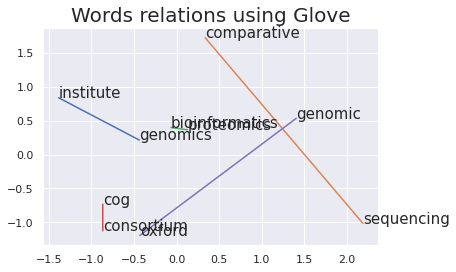

In [100]:
plt.title('Words relations using Glove', fontsize=20)
plot_wordsl(['genomics',
 'institute',
 'sequencing',
 'comparative',
 'proteomics',
 'bioinformatics',
 'consortium',
 'cog',
 'oxford',
 'genomic'], lines=True)

In [107]:
scores_2, keywords_2 = get_matching(df, xtfidf_papers, xtfidf_query_2)

/usr/local/lib/python3.6/dist-packages/numba/typed_passes.py:293: NumbaPerformanceWarning:


The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "<ipython-input-101-b677c163a6a7>", line 2:
@numba.jit(target="cpu", nopython=True, parallel=True, fastmath=True)
def fast_cosine(u, v):
^




In [108]:
df_q2 = df[['paper_id', 'title']].copy()

In [109]:
df_q2['keywords'] = [[x[0] for x in r][:2] for r in keywords_2]

In [110]:
df_q2['score'] = scores_2

In [111]:
df_q2 = df_q2.sort_values(by='score', ascending=False).reset_index(drop=True)

In [112]:
df_q2['title'] = df_q2['title'].apply(lambda x: " ".join(x.split()[:10])+"...")

In [113]:
df_q2.head(10).style.background_gradient(cmap='viridis')

,paper_id,title,keywords,score
0,27f0b2870b687970ff08c0f6be489afdc9548fb7,Encounters with Visual Misinformation and Labels Across Platforms: An Interview...,"['platforms', 'platform']",0.150878
1,ac1eebbd1a54493bab2a612fca9145e4c7458077,Project OPUS: Development and evaluation of an electronic platform for...,"['platform', 'online']",0.144638
2,1daa7c36a1ccd1e2a64a5e19812afac020ba7e83,Online Food Shopping: A Conceptual Analysis for Research Propositions...,"['online', 'platforms']",0.134030
3,f81e6232b619aaee834eb3903c85075b9173fd3d,System dynamics evaluation of household water use behavior and associated...,"['water', 'to']",0.128325
4,8a501ac3a08a65fd5686031cf49717444f885171,What patients “see” doctors in online fever clinics during COVID-19...,"['online', 'to']",0.123383
5,7ef979dc430e365ca94b84ec62bf65b8e96c24f3,Flattening the curve before it flattens us: hospital critical care...,"['surge', 'bed']",0.123208
6,852c7ec055a483a69aadf3fad2257a1a6ce6b684,Human-Computer Interaction Considerations When Developing Cyber Ranges...,"['platforms', 'platform']",0.121781
7,c8935fd840948883b35a04df55bdd3d66c165c77,Evolution of Biochip Technology: A Review from Lab-on-a-Chip to Organ-on-a-Chip...,"['platforms', 'platform']",0.119798
8,917602673e86430eec8154f3913e011c941eff97,Africa’s Nomadic Pastoralists and Their Animals Are an Invisible Frontier...,"['surveillance', 'to']",0.117051
9,324ea00def0a2b834758a06139cf484c3cb8d7da,Framework for the implementation of an Internet of Things (IoT)-based...,"['water', 'system']",0.116327


# Classify

Though arbitrary, after running kmeans, the data is now 'labeled'. This means that we now use supervised learning to see how well the clustering generalizes. This is just one way to evaluate the clustering. If k-means was able to find a meaningful split in the data, it should be possible to train a classifier to predict which cluster a given instance should belong to. 

In [1]:
# function to print out classification model report
def classification_report(model_name, test, pred):
    from sklearn.metrics import precision_score, recall_score
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import f1_score
    
    print(model_name, ":\n")
    print("Accuracy Score: ", '{:,.3f}'.format(float(accuracy_score(test, pred)) * 100), "%")
    print("     Precision: ", '{:,.3f}'.format(float(precision_score(test, pred, average='macro')) * 100), "%")
    print("        Recall: ", '{:,.3f}'.format(float(recall_score(test, pred, average='macro')) * 100), "%")
    print("      F1 score: ", '{:,.3f}'.format(float(f1_score(test, pred, average='macro')) * 100), "%")

Let's split the data into train/test sets

In [ ]:
from sklearn.model_selection import train_test_split

# test set size of 20% of the data and the random seed 42 <3
X_train, X_test, y_train, y_test = train_test_split(X.toarray(),y_pred, test_size=0.2, random_state=42)

print("X_train size:", len(X_train))
print("X_test size:", len(X_test), "\n")

Now let's create a Stochastic Gradient Descent classifier 

**Precision** is ratio of True Positives to True Positives + False Positives. This is the accuracy of positive predictions<br>
**Recall** (also known as TPR) measures the ratio of True Positives to True Positives + False Negatives. It measures the ratio of positive instances that are correctly detected by the classifer.<br>
**F1 score**  is the harmonic average of the precision and recall. F1 score will only be high if both precision and recall are high

#### Cite: [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow: Second Edition | Aurélien Geron](https://github.com/ageron/handson-ml2)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import SGDClassifier

# SGD instance
sgd_clf = SGDClassifier(max_iter=10000, tol=1e-3, random_state=42, n_jobs=-1)
# train SGD
sgd_clf.fit(X_train, y_train)

# cross validation predictions
sgd_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3, n_jobs=-1)

# print out the classification report
classification_report("Stochastic Gradient Descent Report (Training Set)", y_train, sgd_pred)

To test for overfitting, let's see how the model generalizes over the test set

In [ ]:
# cross validation predictions
sgd_pred = cross_val_predict(sgd_clf, X_test, y_test, cv=3, n_jobs=-1)

# print out the classification report
classification_report("Stochastic Gradient Descent Report (Training Set)", y_test, sgd_pred)

Now let's see how the model can generalize across the whole dataset. 

In [ ]:
sgd_cv_score = cross_val_score(sgd_clf, X.toarray(), y_pred, cv=10)
print("Mean cv Score - SGD: {:,.3f}".format(float(sgd_cv_score.mean()) * 100), "%")